# 📊 Analyse Big Data – Consommation Mobile des Clients Orange


Ce notebook vous guide dans l’analyse d’un jeu de données fictif représentant des clients Orange au Cameroun.

📁 Dataset : `dataset_clients_orange.csv`

Chaque ligne représente un client avec des informations sur sa consommation téléphonique et internet.

## 🎯 Objectifs
1. Explorer les données
2. Visualiser les comportements de consommation
3. Réaliser un clustering (KMeans)
4. Interpréter les résultats et proposer des recommandations


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA


## 📥 Chargement du Dataset

In [2]:
df = pd.read_csv("dataset_clients_orange.csv", encoding='latin1')  # ou 'ISO-8859-1'
df.head()


,client_id,age,region,forfait_type,appels_min,data_mo,sms_envoyes,montant_facture
0,10001,56,Sud-Ouest,prépayé,39,2363,29,2362
1,10002,69,Centre,prépayé,220,1300,41,6045
2,10003,46,Littoral,prépayé,124,1612,36,4624
3,10004,32,Littoral,postpayé,57,1966,29,7540
4,10005,60,Sud-Ouest,prépayé,135,790,27,4654


## 🔍 Analyse exploratoire

In [3]:
df.info()
df.describe()
df['forfait_type'].value_counts()
df['region'].value_counts()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   client_id        1000 non-null   int64 
 1   age              1000 non-null   int64 
 2   region           1000 non-null   object
 3   forfait_type     1000 non-null   object
 4   appels_min       1000 non-null   int64 
 5   data_mo          1000 non-null   int64 
 6   sms_envoyes      1000 non-null   int64 
 7   montant_facture  1000 non-null   int64 
dtypes: int64(6), object(2)
memory usage: 62.6+ KB


region
Adamaoua      212
Sud-Ouest     208
Nord-Ouest    206
Littoral      196
Centre        178
Name: count, dtype: int64

Le dataset contient 1 000 lignes et 8 colonnes, sans valeurs manquantes.
On distingue :

- 6 colonnes numériques (int64) telles que age, data_mo, montant_facture…

- 2 colonnes catégorielles (object) : region et forfait_type

Concernant la répartition géographique des clients :

- La région Adamaoua est la plus représentée (212 clients)

- Suivie de Sud-Ouest (208), Nord-Ouest (206), Littoral (196), et Centre (178)

####  1. Pour valeurs manquantes

In [4]:
df.isnull().sum()

client_id          0
age                0
region             0
forfait_type       0
appels_min         0
data_mo            0
sms_envoyes        0
montant_facture    0
dtype: int64

Aucune valeur manquante n’a été détectée dans le dataset. Toutes les colonnes sont complètes. Cela garantit une meilleure qualité d’analyse et évite la nécessité d'imputation ou de suppression de lignes.

#### 2. Pour détecter les doublons

In [5]:
df.duplicated().sum()

np.int64(0)

Le dataset ne contient aucun doublon. Chaque ligne représente un client unique, ce qui confirme l’unicité des observations et évite toute distorsion dans les analyses statistiques ou les algorithmes de clustering.

#### 3. Pour les colonnes catégorielles aussi

In [6]:
df.describe(include='all')

,client_id,age,region,forfait_type,appels_min,data_mo,sms_envoyes,montant_facture
count,1000.000000,1000.00000,1000,1000,1000.000000,1000.000000,1000.000000,1000.000000
unique,NaN,NaN,5,2,NaN,NaN,NaN,NaN
top,NaN,NaN,Adamaoua,prépayé,NaN,NaN,NaN,NaN
freq,NaN,NaN,212,704,NaN,NaN,NaN,NaN
mean,10500.500000,43.81900,NaN,NaN,205.918000,1509.689000,29.842000,5069.027000
std,288.819436,14.99103,NaN,NaN,97.219179,490.448291,5.453511,2720.937526
min,10001.000000,18.00000,NaN,NaN,0.000000,0.000000,15.000000,1000.000000
25%,10250.750000,31.00000,NaN,NaN,138.000000,1179.000000,26.000000,2960.250000
50%,10500.500000,44.00000,NaN,NaN,205.000000,1501.500000,30.000000,4973.500000
75%,10750.250000,56.00000,NaN,NaN,268.250000,1841.500000,33.000000,6977.250000


L’ensemble du dataset comprend 1 000 clients. Les observations suivantes peuvent être faites :

**Colonnes numériques** :

- L’âge moyen des clients est de **43,8 ans**, avec un minimum de **18 ans** et un maximum de **69 ans**.

- En moyenne, les clients utilisent **~206 minutes d’appels**, **~1 510 Mo de data**, envoient **~30 SMS**, et paient environ **5 069 FCFA**.

- Les distributions présentent une certaine dispersion, notamment sur les montants de facturation (écart-type : **~2 720 FCFA**).

**Colonnes catégorielles** :

- La colonne region contient 5 régions distinctes, la plus fréquente étant Adamaoua (212 clients).

- Le forfait_type comprend 2 types : la majorité des clients sont prépayés (704 sur 1000).

Ces statistiques permettent de mieux cerner les profils types et de préparer la segmentation client.

## 📊 Visualisations

#### 1. Histogrammes : consommation data, appels

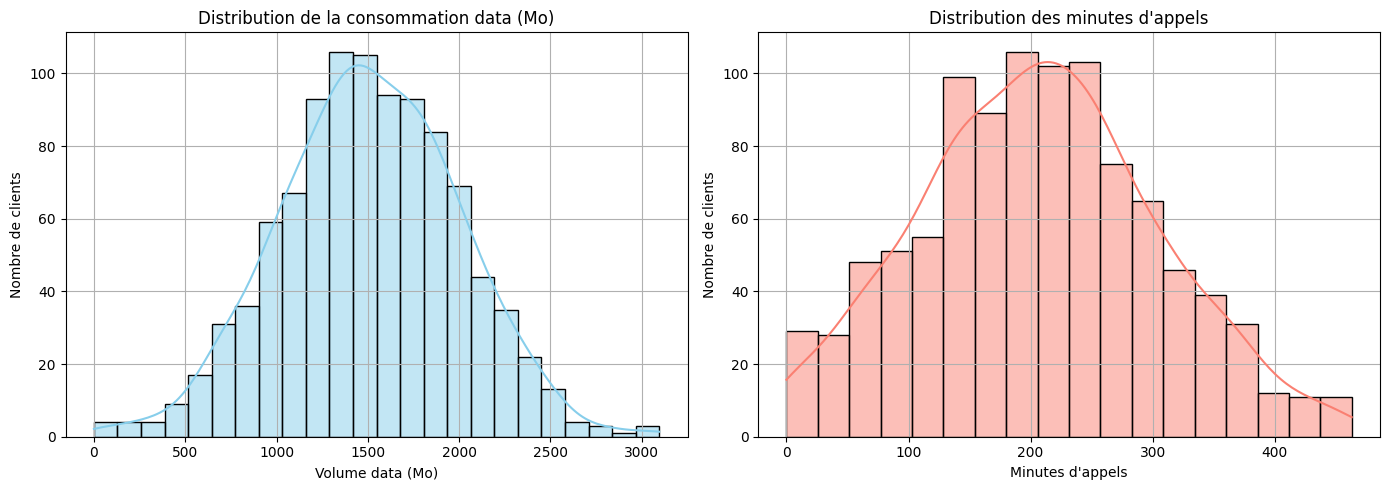

In [7]:
# df[['data_mo', 'appels_min']].hist(bins=30, figsize=(10,4))

# Définir la figure avec deux sous-graphes côte à côte
fig, axes = plt.subplots(1, 2, figsize=(14, 5))  # 1 ligne, 2 colonnes

# Histogramme de la consommation data
sns.histplot(df['data_mo'], kde=True, color='skyblue', ax=axes[0])
axes[0].set_title("Distribution de la consommation data (Mo)")
axes[0].set_xlabel("Volume data (Mo)")
axes[0].set_ylabel("Nombre de clients")
axes[0].grid(True)

# Histogramme des minutes d'appels
sns.histplot(df['appels_min'], kde=True, color='salmon', ax=axes[1])
axes[1].set_title("Distribution des minutes d'appels")
axes[1].set_xlabel("Minutes d'appels")
axes[1].set_ylabel("Nombre de clients")
axes[1].grid(True)

# Ajustement de l'espacement
plt.tight_layout()
plt.show()

#### Distribution de la consommation data (Mo)

- **Forme** : La distribution est globalement en forme de cloche, ce qui indique une tendance à suivre une **loi normale**.
- **Valeur centrale** : Le pic se situe aux alentours de **1400 à 1500 Mo**, indiquant que la majorité des clients consomment cette quantité de data.
- **Asymétrie** : Légère **asymétrie vers la droite** (longue traîne), ce qui suggère l’existence de **gros consommateurs**.
- **Interprétation** : La majorité des clients ont une consommation modérée, mais il existe un petit groupe avec une consommation de données très élevée.

---

#### Distribution des minutes d'appels

- **Forme** : La distribution est également proche d’une **loi normale**, bien que légèrement asymétrique vers la droite.
- **Valeur centrale** : Le maximum est atteint autour de **200 minutes d'appels**.
- **Asymétrie** : Une **traîne droite** indique que certains clients utilisent **beaucoup plus de minutes** que la moyenne.
- **Interprétation** : La plupart des clients passent entre **150 et 250 minutes** d’appels par période, mais une minorité a une activité bien plus intense.

---

#### Remarques 

- Les deux histogrammes montrent des distributions **centrées**, avec des **valeurs extrêmes** du côté droit.
- Cela pourrait être utile pour :
  - Segmenter les clients (faible, moyen, fort consommateur),
  - Adapter les forfaits de manière personnalisée,
  - Détecter d’éventuelles anomalies ou comportements inhabituels.

#### 2. Boxplot des montants par type de forfait

<Axes: xlabel='forfait_type', ylabel='montant_facture'>

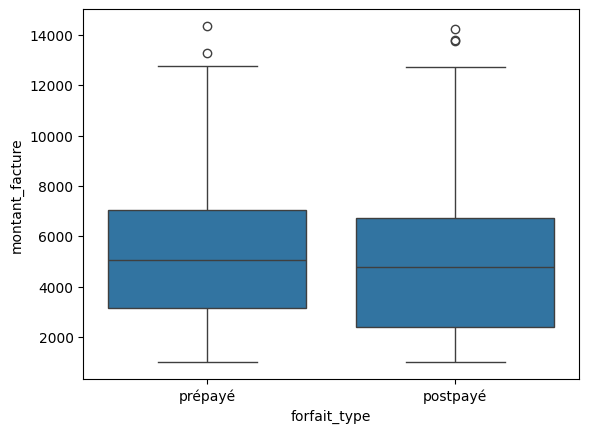

In [8]:
sns.boxplot(data=df, x='forfait_type', y='montant_facture')

Ce boxplot compare les **montants de facture** entre les clients ayant un forfait **prépayé** et ceux ayant un forfait **postpayé**.

---

#### Clients prépayés

- **Médiane** : Autour de **5000 FCFA**, ce qui indique que la moitié des clients prépayés ont une facture inférieure à ce montant.
- **Dispersion** : Les montants varient généralement entre **2000 et 12000 FCFA**, ce qui représente une large gamme de consommation.
- **Valeurs extrêmes** : Quelques **outliers** (valeurs supérieures à 14000 FCFA) existent, montrant des cas de consommation exceptionnellement élevée.

---

#### Clients postpayés

- **Médiane** : Légèrement plus basse que celle des prépayés, environ **4500 FCFA**.
- **Dispersion** : Similaire à celle des prépayés, entre **1500 et 12000 FCFA** environ.
- **Valeurs extrêmes** : Présence d'**outliers également**, similaires à ceux des prépayés.

---

#### Interprétation

- **Surprise** : Contrairement à ce que l’on pourrait attendre, les clients postpayés **n’ont pas une facture systématiquement plus élevée** que les prépayés.
- **Hypothèse possible** : Les clients prépayés pourraient recharger fréquemment, tandis que les postpayés ont une consommation plus modérée ou plafonnée.
- **Utilité business** :
  - Identifier les profils de clients les plus rentables.
  - Adapter les offres en fonction du comportement de paiement.



#### 3. Répartition géographique (bar chart par région)

([0, 1, 2, 3, 4],
 [Text(0, 0, 'Sud-Ouest'),
  Text(1, 0, 'Centre'),
  Text(2, 0, 'Littoral'),
  Text(3, 0, 'Adamaoua'),
  Text(4, 0, 'Nord-Ouest')])

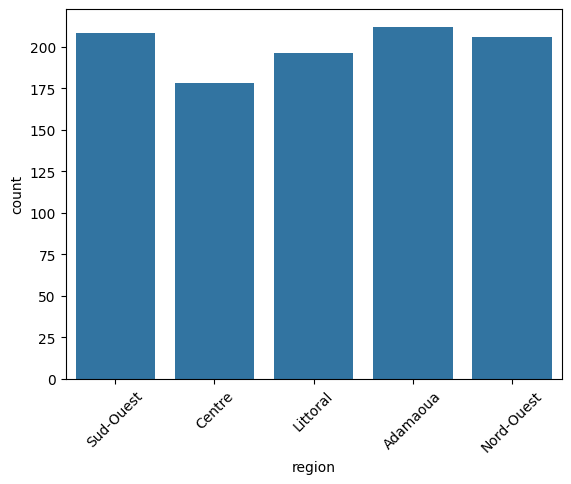

In [9]:
sns.countplot(data=df, x='region')
plt.xticks(rotation=45)

Ce diagramme en barres présente le **nombre de clients** par région. Chaque barre représente une région du Cameroun avec le **nombre de clients** associés.

---

#### Observations

- **Adamoua** est la région qui compte **le plus grand nombre de clients** (environ 215).
- **Centre** est celle qui en compte **le moins** (environ 180).
- Les autres régions comme le **Sud-Ouest**, le **Nord-Ouest** et le **Littoral** ont des effectifs très proches, tournant autour de **200 clients**.

---

#### Interprétation

- **Équilibre global** : Les effectifs sont relativement **répartis de manière homogène** entre les régions, ce qui indique une bonne couverture du service.
- **Opportunités commerciales** :
  - Des campagnes marketing ciblées pourraient être envisagées pour **booster la présence dans la région Centre**, légèrement en retrait.
  - La région de **l'Adamoua**, qui a le plus grand nombre de clients, pourrait faire l’objet d’une analyse approfondie pour identifier les facteurs de succès.

---

#### Conclusion

Ce graphique met en évidence les **variations régionales** du nombre de clients. Ces informations peuvent aider à :
- Optimiser les ressources marketing et commerciales,
- Adapter les offres localement,
- Comprendre les dynamiques géographiques d’adoption du service.


## ⚙️ Préparation des données pour le clustering

#### Étape 1 : Encodage de la variable catégorielle forfait_type

In [10]:
from sklearn.preprocessing import LabelEncoder

# Encodage de 'forfait_type' : prépayé/postpayé → 0/1
df['forfait_encoded'] = LabelEncoder().fit_transform(df['forfait_type'])

#### Étape 2 : Sélection des colonnes pour le clustering

In [11]:
features = ['age', 'appels_min', 'data_mo', 'sms_envoyes', 'montant_facture', 'forfait_encoded']
X = df[features]

#### Étape 3 : Standardisation des données

In [12]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

####  Étape 4 : Réduction de dimension avec PCA (pour visualisation 2D)

In [13]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

## 📌 Clustering des clients (KMeans)

#### Étape 5 : Clustering avec KMeans (ex: 4 groupes)

In [14]:
kmeans = KMeans(n_clusters=4, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

# Ajout des clusters au dataframe
df['cluster'] = clusters

C:\Users\NARCISSE\venv-jupyter\Lib\site-packages\joblib\externals\loky\backend\context.py:131: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\Users\NARCISSE\venv-jupyter\Lib\site-packages\joblib\externals\loky\backend\context.py", line 247, in _count_physical_cores
    cpu_count_physical = _count_physical_cores_win32()
                         ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\NARCISSE\venv-jupyter\Lib\site-packages\joblib\externals\loky\backend\context.py", line 299, in _count_physical_cores_win32
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "C:\Users\NARCISSE\AppData\Local\Programs\Python\Python312\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
    

In [15]:
# kmeans = KMeans(n_clusters=4, random_state=42)
# clusters = kmeans.fit_predict(X_scaled)
# df['cluster'] = clusters


## 🌀 Visualisation des clusters avec PCA

#### Étape 6 : Visualisation des clusters (projection PCA)

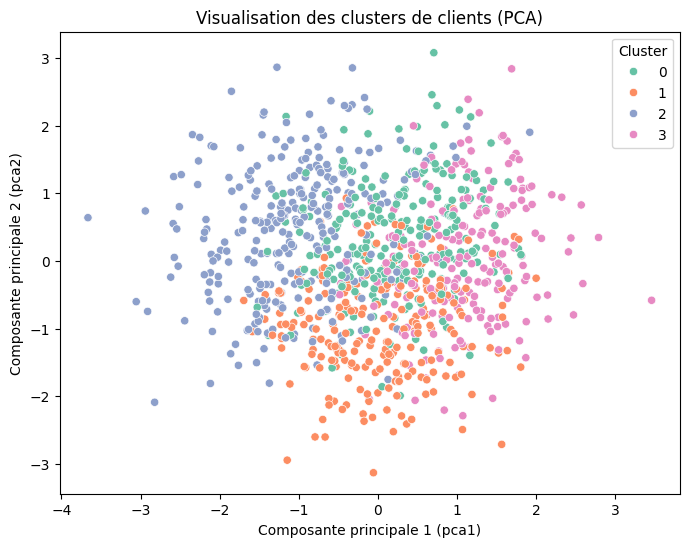

In [16]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=df['cluster'], palette='Set2')
plt.title("Visualisation des clusters de clients (PCA)")
plt.xlabel("Composante principale 1 (pca1)")
plt.ylabel("Composante principale 2 (pca2)")
plt.legend(title='Cluster')
plt.show()

## Alternative : Clusters DBSCAN (projection PCA)

In [17]:
# from sklearn.cluster import DBSCAN

# dbscan = DBSCAN(eps=1.5, min_samples=5)
# dbscan_labels = dbscan.fit_predict(X_scaled)
# df['cluster_dbscan'] = dbscan_labels

# sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=df['cluster_dbscan'], palette='Set2')
# plt.title("Clusters DBSCAN (projection PCA)")
# plt.show()

##  Analyse des Clusters et Recommandations Stratégiques

#### Analyse : Profils à fort potentiel

Pour identifier les segments les plus intéressants à cibler, on peut analyser les caractéristiques moyennes par cluster :

In [18]:
df.groupby('cluster')[['age', 'data_mo', 'appels_min', 'sms_envoyes', 'montant_facture', 'forfait_encoded']].mean()

,age,data_mo,appels_min,sms_envoyes,montant_facture,forfait_encoded
cluster,,,,,,
0,56.511538,1706.503846,182.984615,28.834615,5235.842308,1.000000
1,29.823529,1567.823529,217.684874,26.983193,5376.365546,1.000000
2,43.658703,1582.924915,201.337884,29.580205,4974.904437,0.000000
3,44.191388,1095.976077,227.468900,34.717703,4643.473684,0.985646


| Cluster | Âge moyen | Data (Mo) | Appels (min) | SMS envoyés | Montant facture | Forfait |
|--------:|-----------:|-----------:|--------------:|-------------:|-----------------:|---------:|
| 0       | 56.5       | 1706.5     | 183.0         | 28.8         | 5235.8           | Postpayé (1) |
| 1       | 29.8       | 1567.8     | 217.7         | 27.0         | 5376.4           | Postpayé (1) |
| 2       | 43.7       | 1582.9     | 201.3         | 29.6         | 4974.9           | Prépayé (0) |
| 3       | 44.2       | 1096.0     | 227.5         | 34.7         | 4643.5           | Principalement Postpayé (≈1) |

---

### Identification des Profils à Fort Potentiel

#### Cluster 2 (prépayé + usage élevé)
- **Profil :** consommation importante en data et appels mais encore en prépayé.
- **Opportunité :** **migration vers postpayé** avec bénéfices économiques et qualitatifs.
- **Actions marketing :**
  - Campagne ciblée : _"Profitez de plus de Mo et de minutes avec une offre postpayée adaptée à vos usages."_  
  - Bonus à l’activation postpayée.
  - Comparatif économique : _"Si vous étiez en postpayé, vous auriez économisé X FCFA."_  

---

### Recommandations Marketing par Cluster

#### Cluster 0 (seniors + forte consommation data)
- Offres de **bonus data** ou **services premium** (YouTube, WhatsApp illimité…)
- Fidélisation par **avantages exclusifs**
- Upsell vers **forfaits supérieurs**

#### Cluster 1 (jeunes adultes très connectés)
- **Offres combinées** (data + musique/streaming)
- Campagnes sur **réseaux sociaux**
- **Parrainage & gamification** pour augmenter la fidélité

#### Cluster 3 (fort usage voix et SMS)
- **Bonus SMS & minutes**, appels illimités le week-end
- Intégration **VoIP**
- Migration vers **offres voix/data mixtes**

---

### Synthèse Stratégique

| Objectif                              | Action Recommandée                                              |
|--------------------------------------|------------------------------------------------------------------|
| Augmenter ARPU                       | Upsell vers forfaits supérieurs (clusters 0 et 1)                |
| Convertir prépayés à haut potentiel  | Migration cluster 2 vers postpayé avec bonus                     |
| Réduire churn                        | Fidélisation clients postpayés par avantages exclusifs           |
| Cibler jeunes sur digital            | Campagnes réseaux sociaux (cluster 1)                            |
| Valoriser usage voix/SMS            | Packs d’appels/SMS ciblés, offres mixtes pour cluster 3          |
